In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tqdm.notebook import tqdm

def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)



def show_res(y_actual, y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))




def actual_vs_pred(y_actual, y_pred):
  pred_y_df=pd.DataFrame(
    {
        "Actual_Value":y_actual,
        "Predicted_Value":y_pred,
        "Difference":y_actual-y_pred
    }
    )

  sns.set(rc={'figure.figsize':(10,20)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )

def single_pred(model,data):
  test_sub = {
    'open':[data[0]],
    'high':[data[1]],
    'low':[data[2]]
  }
  test_sub_df = pd.DataFrame(test_sub)

  ex_specie = np.array(test_sub_df.iloc[0]).reshape(1,-1)

  return model.predict(ex_specie)




def test_other_file(model,f_list):
  for i in tqdm(f_list):
    print()
    print(os.path.basename(i))
    test_dataset = pd.read_json(i,typ='series')
    test_df = pd.DataFrame(test_dataset['data'])

    test_X=df.iloc[:,0:3]
    test_y=df.loc[:,'close']

    pred_y = model.predict(test_X)

    show_res(test_y,pred_y)
    print("____________________________________________")
    print("___________                  _______________")
    print()

In [9]:
import numpy as np
import pandas as pd
import os
from glob2 import glob

In [10]:
path = "/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Intraday-1m-ohlcv/APOLLOHOSP"

In [11]:
file_list = glob(path+"/*")

In [12]:
#dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')
dataset = pd.read_json(file_list[0],typ='series')

In [13]:
dataset.head()

status                                               success
remarks                                                     
data       {'open': [5220.0, 5251.95, 5251.6, 5249.0, 524...
dtype: object

In [14]:
df = pd.DataFrame(dataset['data'])

In [15]:
df.shape

(375, 6)

In [16]:
df.head(5)

,open,high,low,close,volume,start_Time
0,5220.00,5252.85,5220.00,5247.45,12005.0,2023-06-19 09:15:00
1,5251.95,5261.75,5247.45,5250.00,7086.0,2023-06-19 09:16:00
2,5251.60,5255.25,5245.00,5249.00,3507.0,2023-06-19 09:17:00
3,5249.00,5249.95,5243.70,5243.95,3696.0,2023-06-19 09:18:00
4,5243.70,5243.70,5236.05,5237.00,2090.0,2023-06-19 09:19:00


#Spliting : X and y

In [17]:
X=df.iloc[:,0:3]
y=df.loc[:,'close']

#Spliting: Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



---



#Training Sections

##Kernel Ridge Regression

In [19]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

In [20]:
show_res(y_test,y_pred)

Mean absolute error = 1.34
Mean squared error = 3.16
Median absolute error = 1.08
Explain variance score = 1.0
R2 score = 1.0


In [21]:
X.iloc[0]

open    5220.00
high    5252.85
low     5220.00
Name: 0, dtype: float64

In [22]:
y.iloc[0]

5247.45

In [23]:
single_pred(krr,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


array([5242.63830315])

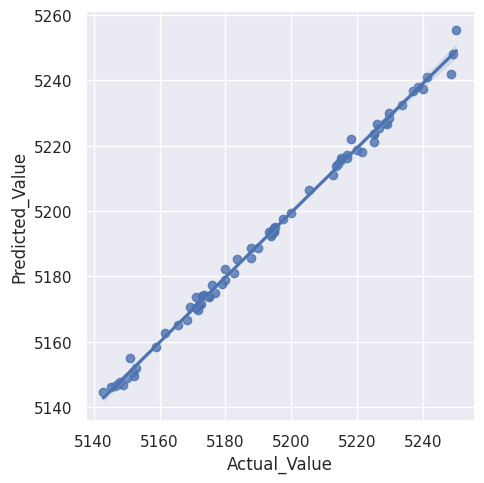

In [24]:
actual_vs_pred(y_test,y_pred)

##Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [26]:
show_res(y_test,y_pred)

Mean absolute error = 1.34
Mean squared error = 3.13
Median absolute error = 1.07
Explain variance score = 1.0
R2 score = 1.0


In [27]:
X_test.iloc[1]

open    5167.90
high    5167.90
low     5164.25
Name: 296, dtype: float64

In [28]:
y_test.iloc[1]

5165.75

In [29]:
single_pred(lin_reg,list(X.iloc[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5255.64384505])

##Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

deci_regr = DecisionTreeRegressor()
deci_regr.fit(X_train, y_train)
y_pred = deci_regr.predict(X_test)

In [31]:
show_res(y_test,y_pred)

Mean absolute error = 2.21
Mean squared error = 10.56
Median absolute error = 1.8
Explain variance score = 0.99
R2 score = 0.99


In [32]:
X_test.iloc[1]

open    5167.90
high    5167.90
low     5164.25
Name: 296, dtype: float64

In [33]:
y_test.iloc[1]

5165.75

In [34]:
single_pred(deci_regr,list(X.iloc[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5249.])

##Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


In [36]:
show_res(y_test,y_pred)

Mean absolute error = 1.73
Mean squared error = 5.6
Median absolute error = 1.19
Explain variance score = 0.99
R2 score = 0.99


In [37]:
X_test.iloc[1]

open    5167.90
high    5167.90
low     5164.25
Name: 296, dtype: float64

In [38]:
y_test.iloc[1]

5165.75

In [39]:
single_pred(rf_reg,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5239.633])

###Lasso Regressor

In [40]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_test)

In [41]:
show_res(y_test,y_pred)

Mean absolute error = 1.73
Mean squared error = 5.6
Median absolute error = 1.19
Explain variance score = 0.99
R2 score = 0.99


In [42]:
X_test.iloc[1]

open    5167.90
high    5167.90
low     5164.25
Name: 296, dtype: float64

In [43]:
y_test.iloc[1]

5165.75

In [44]:
single_pred(lasso,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([5242.2947612])

#Testng for another dataset

##With Kernel Ridge Regression

In [45]:
test_other_file(krr,file_list)

  0%|          | 0/23 [00:00<?, ?it/s]


APOLLOHOSP-1m-2023-06-19.json
Mean absolute error = 1.24
Mean squared error = 2.33
Median absolute error = 1.07
Explain variance score = 1.0
R2 score = 1.0
____________________________________________
___________                  _______________


APOLLOHOSP-1m-2023-06-16.json
Mean absolute error = 1.24
Mean squared error = 2.33
Median absolute error = 1.07
Explain variance score = 1.0
R2 score = 1.0
____________________________________________
___________                  _______________


APOLLOHOSP-1m-2023-06-15.json
Mean absolute error = 1.24
Mean squared error = 2.33
Median absolute error = 1.07
Explain variance score = 1.0
R2 score = 1.0
____________________________________________
___________                  _______________


APOLLOHOSP-1m-2023-06-14.json
Mean absolute error = 1.24
Mean squared error = 2.33
Median absolute error = 1.07
Explain variance score = 1.0
R2 score = 1.0
____________________________________________
___________                  _______________


APOLLOH